## Grover's Search Problem
Grover's algorithm allows for quadratic speedup for unstructured search problem.

## The Algorithm
1. Prepare a uniform superposition of basis states
$$|\phi\rangle = H^{\otimes n}|0\rangle_n $$
2. Apply the grover oracle $ V $ to the state. This geometrically corresponds to a reflection about $ |\phi'\rangle $
3. Apply grover diffusion operator $W$:
$$ W = 2|\phi\rangle\langle\phi| - I$$
4. Repeat steps 2 and 3 approximately $ \sqrt N $ times. If there are $ M>1 $ marked item than repeat approximately $ \sqrt{N/M} $ times

## Grover's  Algorithm Implement in qiskit

In [37]:
#initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy

# import basic plot tools
from qiskit.visualization import plot_histogram

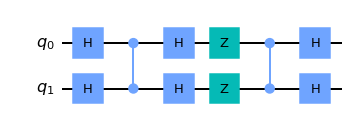

In [42]:
# Initialize 2 bit quantum circuit
n = 2
grover_circuit = QuantumCircuit(n)

# Hadamard Gates on Inputs
grover_circuit.h(0)
grover_circuit.h(1)

# Oracle
grover_circuit.cz(0,1)

# Diffusion operator (U_s) 
grover_circuit.h([0,1])
grover_circuit.z([0,1])
grover_circuit.cz(0,1)
grover_circuit.h([0,1])
grover_circuit.draw(output = 'mpl')

# Grover's algorithm for N=2 only requires one amplification stage

#### Simulate measurements locally using qiskit 

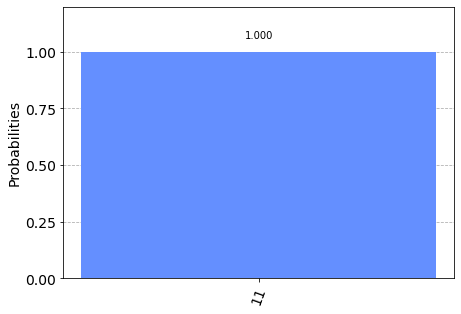

In [43]:
grover_circuit.measure_all() # Add measurement layer to function

qasm_sim = Aer.get_backend('qasm_simulator') # Get qasm simulator
qobj = assemble(grover_circuit) # Prepare circuit for simulation
result = qasm_sim.run(qobj).result() # Get results of simulation
counts = result.get_counts() # Get the counts of each measurement from these resul†ß
plot_histogram(counts) 


### Run on a real device

In [22]:
# Load IBM Q account and get the least busy backend device
provider = IBMQ.load_account()
provider = IBMQ.get_provider("ibm-q")
device = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 3 and 
                                   not x.configuration().simulator and x.status().operational==True))
print("Running on current least busy device: ", device)

ibmqfactory.load_account:WARNING:2021-03-29 18:08:59,909: Credentials are already in use. The existing account in the session will be replaced.


Running on current least busy device:  ibmqx2


In [23]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor
transpiled_grover_circuit = transpile(grover_circuit, device, optimization_level=3)
qobj = assemble(transpiled_grover_circuit)
job = device.run(qobj)
job_monitor(job, interval=2)

Job Status: job has successfully run


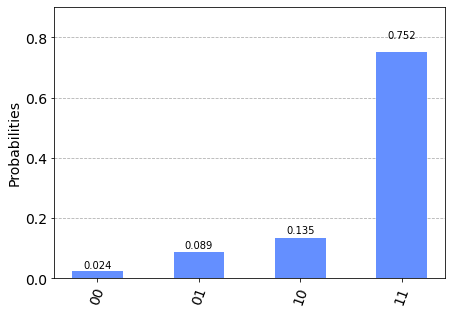

In [24]:
# Get the results from the computation
results = job.result()
answer = results.get_counts(grover_circuit)
plot_histogram(answer)